In [1]:
import pandas
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, log_loss, mean_squared_error, r2_score, explained_variance_score, make_scorer
import matplotlib.pyplot as plt
import xgboost as xgb
import numpy as np
from xgboost import plot_importance

#import shap
import scipy.stats as st
from scipy.stats import randint, poisson
from sklearn.model_selection import RandomizedSearchCV
import pandas as pd
plt.rcParams['font.size'] = 18
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.feature_selection import SelectKBest, f_classif, chi2
import random
from itertools import combinations
from matplotlib.font_manager import FontProperties

In [2]:
df1 = pd.read_csv('data2\etalon_jitter_16Mar20_etalon.ccfSum-telemetryCLEANED.csv')
df2 = pd.read_csv('data2\etalon_jitter_18Mar20_etalon.ccfSum-telemetryCLEANED.csv')
df3 = pd.read_csv('data2\etalon_jitter_26Mar20_Cryo_etalon.ccfSum-telemetryCLEANED.csv')
df4 = pd.read_csv('data2\etalon_jitter_26Mar_whitebox_etalon.ccfSum-telemetryCLEANED.csv')

In [3]:
frames = [df1, df2, df3, df4]
data = np.array(pd.concat(frames))

In [4]:
np.array(df1)[-1,0] - np.array(df1)[0,0]

0.1453199996612966

In [5]:
# jd = np.array((result['JD_UTC']))

#print(df1['JD_UTC'][0])
# print(df2['JD_UTC'][10])
# print(df3['JD_UTC'][10])
# print(df4['JD_UTC'][10])

# print(jd[10], jd[len(df1)+10], jd[len(df1)+len(df2)+10], jd[len(df1)+len(df2)+len(df3)+10])

In [6]:
names_temp = np.array(df1.axes)
names = []
for i in range(len(names_temp[1])):
    names.append(names_temp[1][i])
names = np.array(names)

# Regression - XGBoost

In [7]:
#test = np.array(df4)[:,3:]
X_test = np.array(df4)[:,3:]
y_test = np.array(df4)[:,1]


frames = [df1, df2, df3]
X = np.array(pd.concat(frames))[:,3:]
y = np.array(pd.concat(frames))[:,1]

### Random Search

In [8]:
seed = 42

parameters_RandomSearch = {'eta': st.uniform(), 
                           'num_round': st.randint(1,11),
                           'max_depth': st.randint(1,10)}

clf_xgb = xgb.XGBRegressor(random_state = seed)

n_iter_search = 10

exp_var = make_scorer(explained_variance_score)
r2 = make_scorer(r2_score)



RandomSearch = RandomizedSearchCV(clf_xgb, 
                                  param_distributions=parameters_RandomSearch, 
                                  n_iter=n_iter_search, 
                                  cv=5, 
                                  return_train_score=True,
                                  random_state=seed,
                                  verbose = False,
                                  scoring = exp_var)

In [9]:
RandomSearch.fit(X, y);

RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.5f}")

[16:21:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:20] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[16:21:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:22] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bi

[16:21:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:21:24] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { num_round } might not be used.

  This may not be accurate due to some parameters are only used in language bi

In [10]:
model = xgb.XGBRegressor()
model.fit(X, y);
ypred = model.predict(X_test)

In [11]:
explained_variance_score(y_test,ypred)

-0.20819765119276123

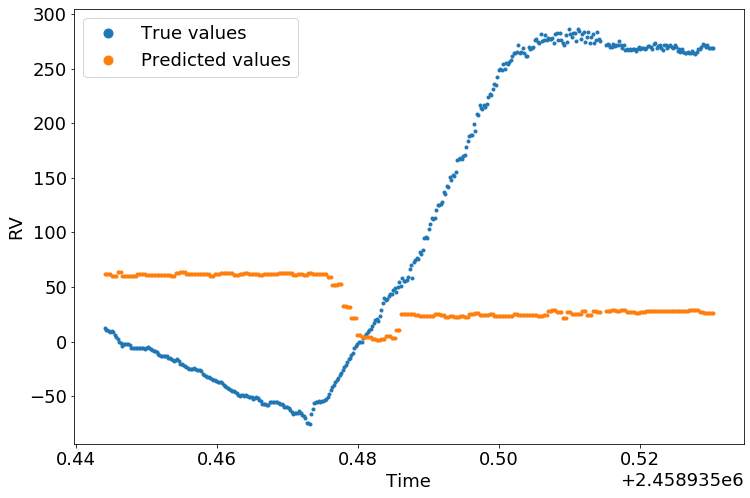

In [12]:
time =  np.array(df4)[:,0]

plt.figure(figsize=(12,8))
plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
plt.plot(time,ypred, '.', color='C1', linewidth = 2, label = 'Predicted values')
plt.xlabel('Time')
plt.ylabel('RV')
plt.legend(markerscale=3);

### Shap

In [13]:
# shap_values = shap.TreeExplainer(model).shap_values(X)
# shap.summary_plot(shap_values, X, plot_type="bar")

# NN

In [14]:
scaler = StandardScaler()
scaler.fit(X)
StandardScaler(copy=True, with_mean=True, with_std=True)
X_train = scaler.transform(X)
X_test = scaler.transform(X_test)

In [15]:
mlp = MLPRegressor(hidden_layer_sizes=(100,100),max_iter=10000, learning_rate='adaptive', random_state=seed);
mlp.fit(X_train,y);
ypred_nn = mlp.predict(X_test)


# r2_score(y_test,ypred_nn)

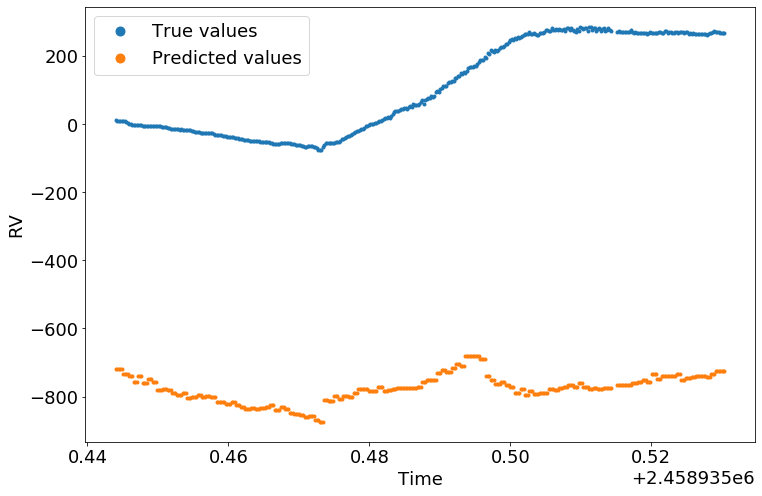

In [16]:
plt.figure(figsize=(12,8))
plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
plt.plot(time,ypred_nn, '.', color='C1', linewidth = 2, label = 'Predicted values')
plt.xlabel('Time')
plt.ylabel('RV')
plt.legend(markerscale=3);

# Simones script

In [17]:
#%run -i "LSTM.py"

# New data

In [18]:
dfnew = pd.read_csv('data\etalon_jitter_29May20_etalon.ccfSum-telemetry.csv')
newData = np.array(dfnew)

np.savetxt('AllDataNew.txt', newData)



0.1283249999396503

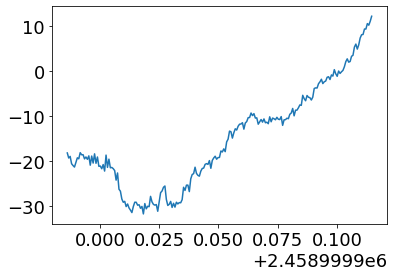

In [19]:
plt.plot(newData[:,0],newData[:,1])

newData[-1,0]-newData[0,0]

In [20]:
data1 = np.array(df1)
data2 = np.array(df2)
data3 = np.array(df3)
data4 = np.array(df4)

Text(0.5, 1.0, 'Data4')

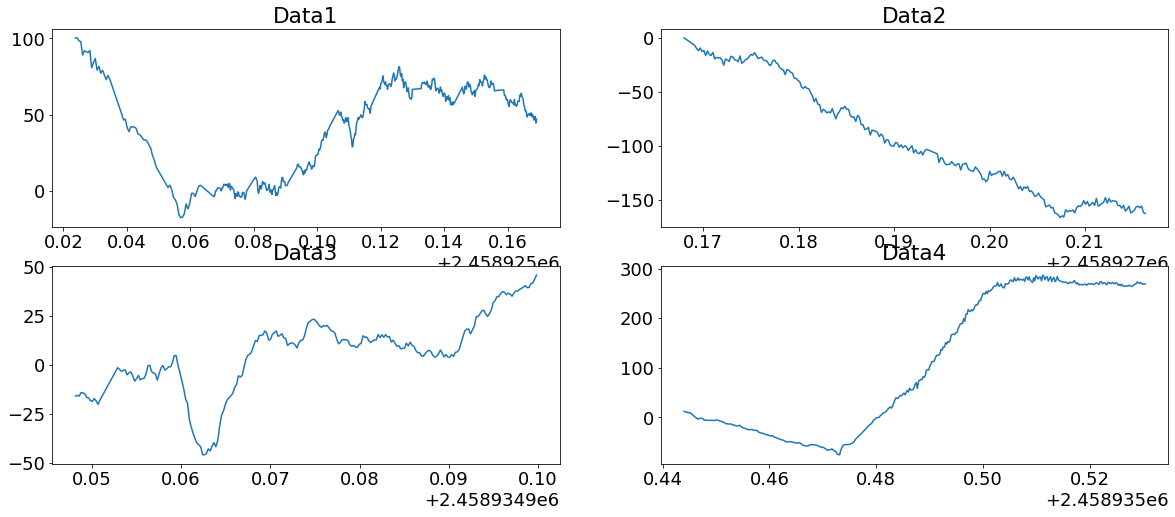

In [21]:
plt.figure(figsize=(20,8))

plt.subplot(221)
plt.plot(data1[:,0],data1[:,1])
plt.title('Data1')

plt.subplot(222)
plt.plot(data2[:,0],data2[:,1])
plt.title('Data2')

plt.subplot(223)
plt.plot(data3[:,0],data3[:,1])
plt.title('Data3')

plt.subplot(224)
plt.plot(data4[:,0],data4[:,1])
plt.title('Data4')


In [22]:
X_test = newData[:,3:]
y_test = newData[:,1]


frames_0 = [df1, df2, df3, df4]
frames_1 = [df1, df2, df3]
frames_2 = [df1, df2]
frames_3 = [df1]

frame_tot = [df1, df2, df3, df4]

X = np.array(pd.concat(frames_1))[:,3:]
y = np.array(pd.concat(frames_1))[:,1]

input = frame_tot

output = sum([list(map(list, combinations(input, i))) for i in range(len(input) + 1)], [])
output = output[1:]

<function matplotlib.pyplot.show(*args, **kw)>

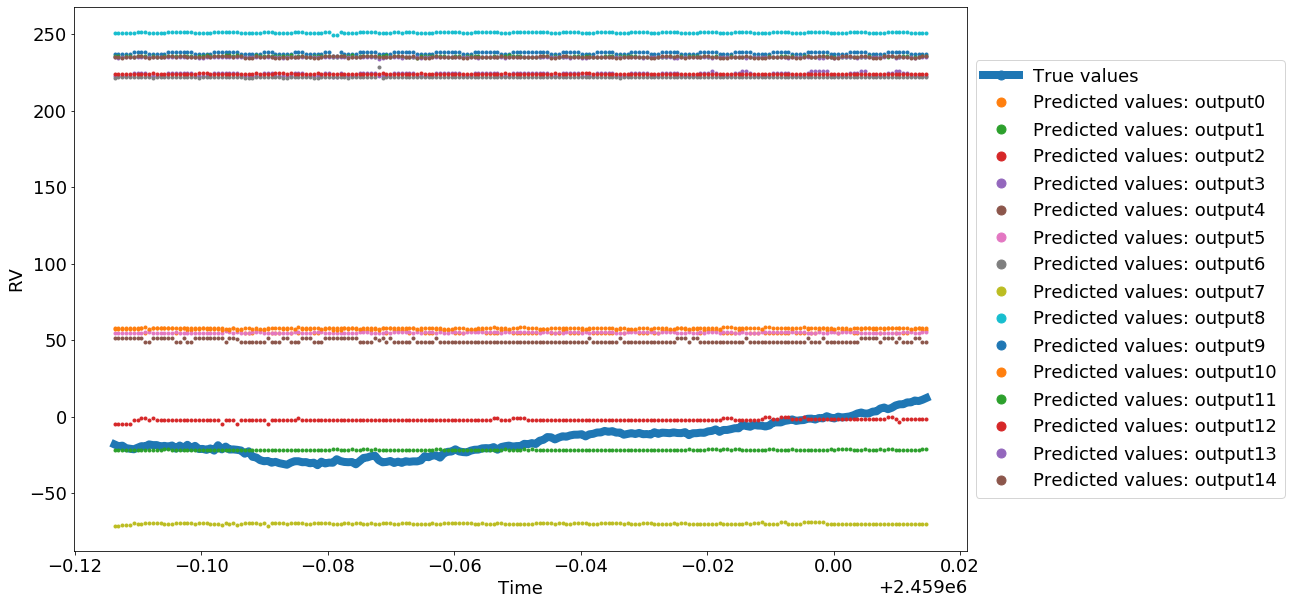

In [23]:
X_test = newData[:,3:]
y_test = newData[:,1]

time =  newData[:,0]

plt.figure(figsize=(16,10))

for i in range(len(output)):
    frames = output[i]
    X = np.array(pd.concat(frames))[:,3:]
    y = np.array(pd.concat(frames))[:,1]
    
    model = xgb.XGBRegressor()
    model.fit(X, y);
    ypred = model.predict(X_test)
    #print(ypred)
#     ypreds.append(ypred)
    
    
    if i == 0:
        plt.plot(time,y_test, '.-', color='C0', linewidth = 8, label = 'True values')
    plt.plot(time,ypred, '.', color=f'C{i+1}', linewidth = 2, label = f'Predicted values: output{i}')
    plt.xlabel('Time')
    plt.ylabel('RV')
    plt.legend(markerscale=3, loc='center left', bbox_to_anchor=(1, 0.5));
    
plt.show

In [24]:
seed = 42

parameters_RandomSearch = {'eta': st.uniform(), 
                           'num_round': st.randint(1,11),
                           'max_depth': st.randint(1,10)}

clf_xgb = xgb.XGBRegressor(random_state = seed)

n_iter_search = 10

exp_var = make_scorer(explained_variance_score)
r2 = make_scorer(r2_score)



RandomSearch = RandomizedSearchCV(clf_xgb, 
                                  param_distributions=parameters_RandomSearch, 
                                  n_iter=n_iter_search, 
                                  cv=5, 
                                  return_train_score=True,
                                  random_state=seed,
                                  verbose = False,
                                  scoring = exp_var)

In [25]:
# RandomSearch.fit(X, y);

# RandomSearch_results = pd.DataFrame(RandomSearch.cv_results_)                 
# print("Random Search: \tBest parameters: ", RandomSearch.best_params_, f", Best scores: {RandomSearch.best_score_:.5f}")

In [26]:
model = xgb.XGBRegressor()
model.fit(X, y);
ypred = model.predict(X_test)

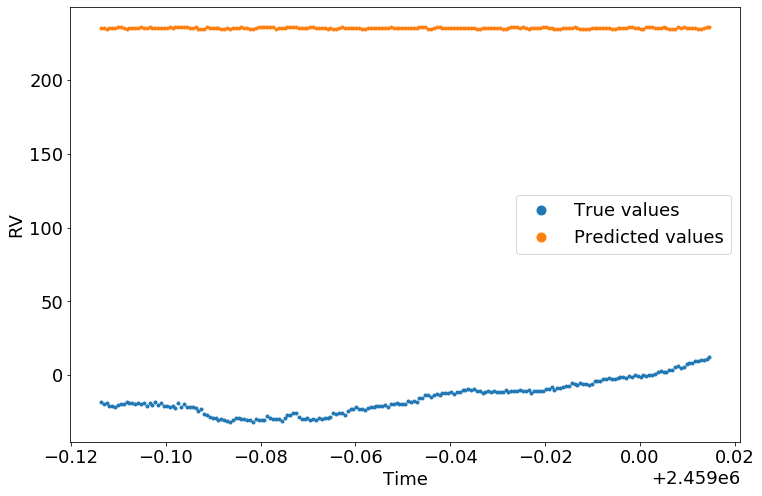

In [27]:
time =  newData[:,0]

plt.figure(figsize=(12,8))
plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
plt.plot(time,ypred, '.', color='C1', linewidth = 2, label = 'Predicted values')
plt.xlabel('Time')
plt.ylabel('RV')
plt.legend(markerscale=3);

In [28]:
v3 = np.loadtxt('../../../Downloads/AllDatav3.txt')

# NN

In [29]:
seed = 42

time =  newData[:,0]

X_test = newData[:,3:]
y_test = newData[:,1]

plt.figure(figsize=(12,8))

for i in range(2):
    
    frames = frame_tot[i]
    
    X = np.array(pd.concat(frames))[:,3:]
    y = np.array(pd.concat(frames))[:,1]
    
    scaler = StandardScaler()
    scaler.fit(X)
    StandardScaler(copy=True, with_mean=True, with_std=True)
    X_train = scaler.transform(X)
    X_test = scaler.transform(X_test)
    
    mlp = MLPRegressor(hidden_layer_sizes=(28,27),max_iter=10000, learning_rate='adaptive', random_state=seed);
    mlp.fit(X_train,y);
    ypred = mlp.predict(X_test)

    
    
    if i == 0:
        plt.plot(time,y_test, '.', color='C0', linewidth = 2, label = 'True values')
    plt.plot(time,ypred, '.', color=f'C{i+1}', linewidth = 2, label = f'Predicted values: frames_{i}')
    plt.xlabel('Time')
    plt.ylabel('RV')
    plt.legend(markerscale=3);
    
plt.show

TypeError: first argument must be an iterable of pandas objects, you passed an object of type "DataFrame"

<Figure size 864x576 with 0 Axes>